In [ ]:
import warnings

warnings.filterwarnings("ignore")
import os

if "jbook" in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../..")))
FORCE = False

# Data Cleaning
In the previous section, we analyzed the AppVoCAI dataset, evaluating its validity, completeness, uniqueness, relevance, and adherence to data privacy concerns. This section is about duplicate deleting, language filtering, artifact removing, PII masking, character normalizing data cleaning. Our data cleaning methodology focuses on addressing critical data quality issues that could undermine the integrity of downstream analyses, while preserving the text as close to its original form as possible. By adopting this conservative approach, we tackle key issues without sacrificing the nuance and representativeness of the data, ensuring the models are presented with rich, authentic input.

### Data Cleaning Key Evaluation Questions (KEQs)
Although, this data cleaning approach comprises many of the preprocessing techniques commonly found in the literature {cite}`symeonidisComparativeEvaluationPreprocessing2018`, the following data cleaning approach is motivated by three guiding questions.

1. What’s essential to remove, and what can be left intact to preserve meaning?
2. How do we best preserve text richness and nuance?
3. How can the data cleaning process best exploit model strengths towards optimal model performance?

These Key Evaluation Questions (KEQs) crystallized our approach which balanced data quality with model sophistication.

### Data Cleaning Strategy
The following describes our data cleaning process and steps, executed in the order listed. We begin with 'safe' techniques that carry minimal risk of compromising downstream cleaning tasks. For instance, UTF-8 encoding can impact the accuracy of language detection algorithms, especially if characters carry language-specific information. Removing special characters may compromise the detection of Personally Identifiable Information (PII) such as URLs and email addresses. As the process progresses, steps carry a greater impact on the data, its expressiveness, and representation.

Our minimalist, *leave-as-is* approach can depart from data cleaning orthodoxy and standard practice. In such cases, we are transparent with our rationale. With that, our process is as follows:

1. **Review ID Deduplication**: For duplicate review IDs, our policy for retention is based on several criteria: the most recent review date is prioritized, followed by the longest review text, and, if all else is equal, the review with the lowest row index is retained. This ensures that we keep the most informative and relevant reviews.
2. **Control Characters**: We remove non-printable characters from the Unicode and ASCII character sets that are used to control text flow or hardware devices (e.g., newline, tab, or carriage return). These characters have no analytical value and can interfere with text processing.
3. **Privacy**: URLs, email addresses and phone numbers are removed from the dataset to ensure adherence to data privacy and minimal information policies.
4. **Remove Non-English Text**: We identify and remove non-English app names and reviews to maintain linguistic uniformity within the dataset, which is crucial for consistent language-based analysis.
5. **HTML Characters**: Common in scraped data, HTML entities (e.g., `&amp;`, `&#39;`) are removed as they do not convey meaningful content. This ensures that the text is clean and ready for analysis.
6. **Accents and Diacritics**: We normalize accented characters (e.g., converting `é` to `e`) to reduce unnecessary text variation, which simplifies analysis without compromising the meaning of the content.
7. **Repetition**: Excess character, sequence, word and phrase repetition is reduced, but not eliminated to perserve artifacts that may signal emphasis.
8. **Non-Informative Reviews**: Reviews that don't match minimum length criteria are removed.
9. **Special Characters**: Excessive special characters can indicate SPAM, emotional intensity, or nonsensical content. We apply a threshold: if special characters make up more than 35% of the review text, the review is removed. 
10. **Elongation Handling**: Elongated words (e.g., "soooo") convey emphasis in informal text, which is valuable for sentiment analysis. We use a threshold approach to limit characters that appear four or more times consecutively to a maximum of three (e.g., "soooo" becomes "sooo"), preserving emphasis while maintaining readability.
11. **Excessive Whitespace**: Excessive whitespace is removed.

### Data Cleaning Techniques Not Implemented
In natural language processing (NLP), text cleaning measures such as lower-casing, contraction and abbreviation expansion, spelling correction, and the removal of emoticons, emojis, and other artifacts are considered standard practice. Given that transformer models are fine-tuned on large user generated content datasets such as IMDB Movie Reviews and SemEval Laptop Reviews dataset, they are highly adept at handling a wide variety of tokens, including emojis, spelling variations, abbreviations and contractions. So, we take a **leave emojis as-is** approach. By leveraging the inherent strengths of transformer - particularly their ability to tokenize subword units and learn from context — we preserve the natural, authentic nature of user-generated content.

Hey Siri, play my Data Cleaning playlist.

### Import Libraries

In [2]:
from discover.container import DiscoverContainer
from discover.flow.stage.data_prep.quality import DataQualityStage
from discover.infra.config.flow import FlowConfigReader
from discover.app.clean import DataCleaningAnalysis
from discover.flow.stage.data_prep.clean import DataCleaningStage
from discover.core.flow import PhaseDef, StageDef

### Dependency Container

In [3]:
container = DiscoverContainer()
container.init_resources()
container.wire(
    modules=[
        "discover.app.clean",
        "discover.flow.stage.base",
    ],
)

## Data Cleaning Pipeline
This code snippet demonstrates how to set up and run a data cleaning stage based on a configuration obtained from a configuration reader. Here’s a breakdown of the steps:

1. **Obtain the Configuration**: 
   - A `FlowConfigReader` instance (`reader`) is used to load the configuration. 
   - The `get_stage_config` method retrieves the stage configuration for data preparation and cleaning.

2. **Build the Data Cleaning Stage**:
   - The `DataCleaningStage.build` method initializes the data cleaning stage with the provided `stage_config`. Setting `force=False` ensures the stage is only built if the endpoint doesn't already exists.

3. **Run the Data Cleaning Stage**:
   - Finally, the `run` method executes the data cleaning stage and returns an `asset_id`, which likely identifies the cleaned dataset or asset generated by this stage.



In [4]:
# Obtain the configuration
reader = FlowConfigReader()
stage_config = reader.get_stage_config(phase=PhaseDef.DATAPREP, stage=StageDef.CLEAN)

# Build and run Data Ingestion Stage
stage = DataCleaningStage.build(stage_config=stage_config, force=FORCE)
asset_id = stage.run()



# ============================================================================== #
#                              Data Cleaning Stage                               #
# ============================================================================== #



your 131072x1 screen size is bogus. expect trouble
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).




                          DetectOrRepairUniquenessTask                          
                          ----------------------------                          
                          Start Datetime | Mon, 02 Dec 2024 19:12:07
                       Complete Datetime | Mon, 02 Dec 2024 19:12:07
                                 Runtime | 0.09 seconds


                         DetectOrRepairControlCharsTask                         
                         ------------------------------                         
                          Start Datetime | Mon, 02 Dec 2024 19:12:07
                       Complete Datetime | Mon, 02 Dec 2024 19:12:07
                                 Runtime | 0.1 seconds


                             DetectOrRepairURLTask                              
                             ---------------------                              
                          Start Datetime | Mon, 02 Dec 2024 19:12:07
                       Complete Datetime | Mon, 02 D



                              Data Cleaning Stage                               
                           Stage Started | Mon, 02 Dec 2024 19:11:55
                         Stage Completed | Mon, 02 Dec 2024 19:22:21
                           Stage Runtime | 10.0 minutes and 26.46 seconds


# ============================================================================ #



## Data Cleaning Assessment

In [5]:
dcr = DataCleaningAnalysis()
dcr.compare()



                        Data Cleaning Dataset Comparison                        
                            rows_removed | 8,451
                              rows_added | 0
                           rows_modified | 78,220
                       self_dataset_rows | 86,705
                       self_dataset_size | 74160963
                      other_dataset_rows | 78,254
                      other_dataset_size | 68375461


,Dimension,Score
0,Completeness,0.914620
1,Validity,0.999969
2,Relevance,0.999964
3,Uniqueness,1.000000
4,Privacy,0.994518


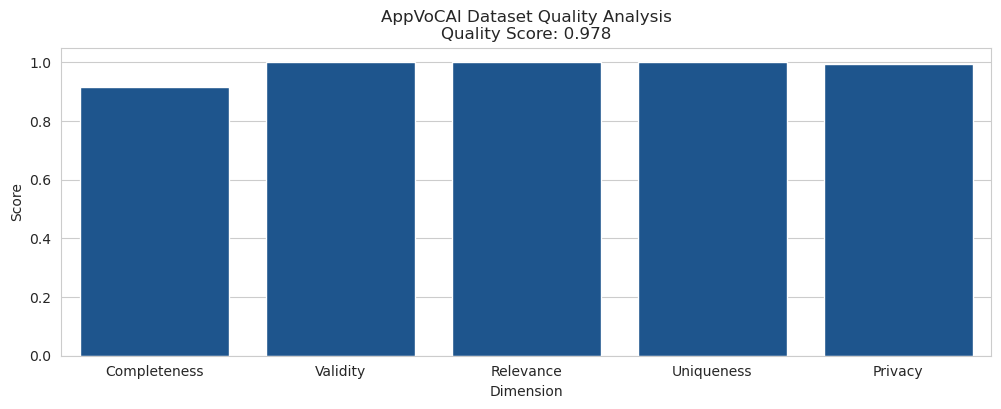

In [6]:
dcr.analyze_quality()

## Closing
With data cleaning complete, we have addressed the critical anomalies without over-processing.

In the next section, we turn our attention to data enrichment. 